In [6]:
#  sudo apt install python3-ipykernel
import struct as st
import numpy as np

In [12]:
def leeWave(fileWave):
    # leemos el fichero en binario 
    with open(fileWave, 'rb') as fpWave: 
        formato = '<4sI4s'
        datos = fpWave.read(st.calcsize(formato))
        chunkID, chunkSize, format = st.unpack(formato, datos)
        if chunkID != b'RIFF' or format != b'WAVE':
            raise Exception(f"El fichero {fileWave} no tiene formato WAVE")
        print(f"La mida del fitxer és de {chunkSize+8} bytes.")

In [13]:
leeWave('luzbel44.wav')

La mida del fitxer és de 190226 bytes.


In [14]:
def leeWave(fileWave):
    # leemos el fichero en binario 
    with open(fileWave, 'rb') as fpWave: 
        formato = '<4sI4s'
        datos = fpWave.read(st.calcsize(formato))
        chunkID, chunkSize, format = st.unpack(formato, datos)
        if chunkID != b'RIFF' or format != b'WAVE':
            raise Exception(f"El fichero {fileWave} no tiene formato WAVE")
        fpWave.seek(36, 0)
        formato = "<4sI"
        datos = fpWave.read(st.calcsize(formato))
        subChunk2ID, subChunk2Size = st.unpack(formato, datos)
        numMostres = subChunk2Size // 2
        formato = f"<{numMostres}h"
        datos = fpWave.read(st.calcsize(formato))
        mostres = st.unpack(formato, datos)
    return mostres

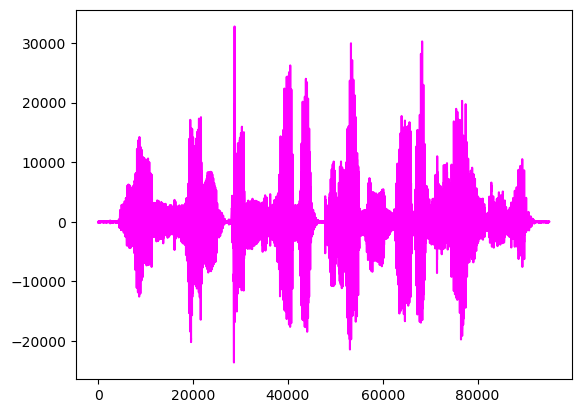

In [25]:
import matplotlib.pyplot as plt
algo = leeWave('luzbel44.wav')
plt.plot(algo, "magenta")

Leer el fichero de notas y sacar su información (num de iD, nombre completo y nota)

In [27]:
with open("alumnos.txt", "rt") as fpAlumnos:
    for alumno in fpAlumnos:
        print(alumno.strip()) #para eliminar los espacios en blanco: strip()

Nuria Rodriguez Pardo 10
Mark Bonete Ventura 6
Pol Alaminos Martorell 5


## Expresiones regulares
Es una gramática que describe cadenas de texto.

In [48]:
# La expresión más sencilla es el literal
# estan en la bibliotecta re 
# re.search() y re.match() hacen cosas semejantes
# re.search() localiza una expresión regular y la devuelve si la encuentra

import re

In [49]:
re.search("expresion regular", "El literal es la expresion regular mas sencilla")

<re.Match object; span=(17, 34), match='expresion regular'>

In [50]:
re.search(".xpresion regular", "El literal es la expresion regular mas sencilla") # El punto se puede susbstituir por cualquier caracter

<re.Match object; span=(17, 34), match='expresion regular'>

In [51]:
re.search("^xpresion regular", "El literal es la expresion regular mas sencilla") # no coincide porque no encuentra

In [52]:
re.search("El literal", "El literal es la expresion regular mas sencilla")

<re.Match object; span=(0, 10), match='El literal'>

In [53]:
re.search("que sencilla", "antes muerta que sencilla")

<re.Match object; span=(13, 25), match='que sencilla'>

In [55]:
re.search("que sencilla$", "antes muerta que sencilla.") # el dolar obliga a que se lea el último carácter de la cadena

In [58]:
re.search("que sencilla", "antes muerta que sencilla")

<re.Match object; span=(17, 30), match='sencillaaaaaa'>

In [65]:
re.search("que sencilla*", "antes muerta que sencill") # permite repetir cero caracteres o más

<re.Match object; span=(13, 24), match='que sencill'>

In [66]:
re.search("que sencilla*", "antes muerta que sencillaaa") # permite repetir un caracter o más

<re.Match object; span=(13, 27), match='que sencillaaa'>

In [67]:
re.search("que sencilla?$", "antes muerta que sencill") # ? uno o cero

<re.Match object; span=(13, 24), match='que sencill'>

In [74]:
re.search("que sencilla{3,5}$", "antes muerta que sencillaaaa")

<re.Match object; span=(13, 28), match='que sencillaaaa'>

In [77]:
# [aoi]
# Son las aceptadas
re.search("que sencill[aoi]", "antes muerta que sencilla")
re.search("que sencill[aoi]", "antes muerta que sencillo")
re.search("que sencill[aoi]", "antes muerta que sencilli")

<re.Match object; span=(13, 25), match='que sencilli'>

In [90]:
re.search("sencill[^eu]", "antes muerta que sencilla") # para excluir

<re.Match object; span=(17, 25), match='sencilla'>

In [88]:
re.search("sencill(e)", "antes muerta que sencill(e)")

In [91]:
re.search("sencill(e)", "antes muerta que sencille")

<re.Match object; span=(17, 25), match='sencille'>

In [93]:
re.search("sencill\\(e\\)", "antes muerta que sencill(e)") # para que detecte los paréntesis 

<re.Match object; span=(17, 27), match='sencill(e)'>

In [96]:
re.search("https:\\\\\\\\upc.edu", "https:\\\\upc.edu\\eseiaat")

<re.Match object; span=(0, 15), match='https:\\\\upc.edu'>

In [98]:
re.search(r"https:\\\\upc.edu", "https:\\upc.edu\eseiaat")

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_16050/3301069849.py:1: SyntaxWarning: invalid escape sequence '\e'
  re.search(r"https:\\\\upc.edu", "https:\\upc.edu\eseiaat")
